In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

import seawater as gsw

In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0118-09.SALT.nc')
plotvar = data.variables['SALT'][0,:,:]
salt = plotvar[:,200,0]

In [3]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0118-09.TEMP.nc')
plotvar = data.variables['TEMP'][0,:,:]
temp = plotvar[:,200,0]

In [34]:
# Figure out boudaries (mins and maxs)
smin = salt.min() - (0.01 * salt.min())
smax = salt.max() + (0.01 * salt.max())
tmin = temp.min() - (0.01 * temp.max())
tmax = temp.max() + (0.01 * temp.max())

In [35]:
# Calculate how many gridcells we need in the x and y dimensions
xdim = round((smax-smin)/0.1+1,0)
ydim = round((tmax-tmin)/0.1+1,0)

In [36]:
tmin

-1.7731723189353943

In [37]:
# Create empty grid of zeros
dens = np.zeros((int(ydim),int(xdim)))

In [38]:
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)*0.1 + tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin

In [39]:
ti

array([-1.67317232, -1.5758039 , -1.47843548, -1.38106706, -1.28369863,
       -1.18633021, -1.08896179, -0.99159337, -0.89422495, -0.79685653,
       -0.69948811, -0.60211969, -0.50475127, -0.40738285, -0.31001442,
       -0.212646  , -0.11527758, -0.01790916,  0.07945926,  0.17682768,
        0.2741961 ,  0.37156452,  0.46893294,  0.56630137,  0.66366979,
        0.76103821,  0.85840663,  0.95577505,  1.05314347,  1.15051189,
        1.24788031,  1.34524873,  1.44261715,  1.53998558,  1.637354  ,
        1.73472242,  1.83209084,  1.92945926,  2.02682768])

In [40]:
si

array([34.01953209, 34.11119876, 34.20286542, 34.29453209, 34.38619876,
       34.47786542, 34.56953209, 34.66119876, 34.75286542, 34.84453209,
       34.93619876, 35.02786542, 35.11953209])

In [41]:

data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0118-09.PD.nc')
plotvar = data.variables['PD'][0,:,:]
density = plotvar[:,200,0]

In [42]:
density*1000-1000

masked_array(data=[27.737060546875, 27.737060546875, 27.737060546875,
                   27.737060546875, 27.737060546875, 27.737060546875,
                   27.7371826171875, 27.7374267578125, 27.737548828125,
                   27.7376708984375, 27.7379150390625, 27.7379150390625,
                   27.7379150390625, 27.7679443359375, 27.771240234375,
                   27.7750244140625, 27.775146484375, 27.7752685546875,
                   27.7757568359375, 27.777099609375, 27.777099609375,
                   27.777099609375, 27.777099609375, 27.7772216796875,
                   27.7772216796875, 27.7777099609375, 27.77783203125,
                   27.7779541015625, 27.778076171875, 27.7784423828125,
                   27.7784423828125, 27.778564453125, 27.77978515625,
                   27.7799072265625, 27.7802734375, 27.7803955078125,
                   27.78564453125, 27.7857666015625, 27.7857666015625,
                   27.7861328125, 27.7861328125, 27.7861328125,
           

In [43]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/depth.nc')
C = data1.variables['z_t'][:]/100

In [44]:
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.dens0(si[i],ti[j])-1000

In [45]:
dens

array([[27.38044201, 27.45495005, 27.52945984, 27.60397139, 27.67848472,
        27.75299982, 27.82751671, 27.90203539, 27.97655588, 28.05107817,
        28.12560229, 28.20012824, 28.27465602],
       [27.37770113, 27.4521788 , 27.52665822, 27.60113942, 27.67562241,
        27.75010718, 27.82459375, 27.89908212, 27.97357231, 28.04806432,
        28.12255817, 28.19705385, 28.27155138],
       [27.37482408, 27.44927148, 27.52372066, 27.59817162, 27.67262438,
        27.74707893, 27.82153529, 27.89599348, 27.97045348, 28.04491532,
        28.11937901, 28.19384454, 28.26831193],
       [27.37181129, 27.44622854, 27.52064758, 27.59506842, 27.66949106,
        27.74391551, 27.81834178, 27.89276989, 27.96719982, 28.04163161,
        28.11606524, 28.19050074, 28.26493811],
       [27.36866318, 27.4430504 , 27.51743942, 27.59183024, 27.66622288,
        27.74061735, 27.81501364, 27.88941178, 27.96381176, 28.0382136 ,
        28.1126173 , 28.18702288, 28.26143033],
       [27.36538018, 27.439737

Text(0, 0.5, 'Temperature (C)')

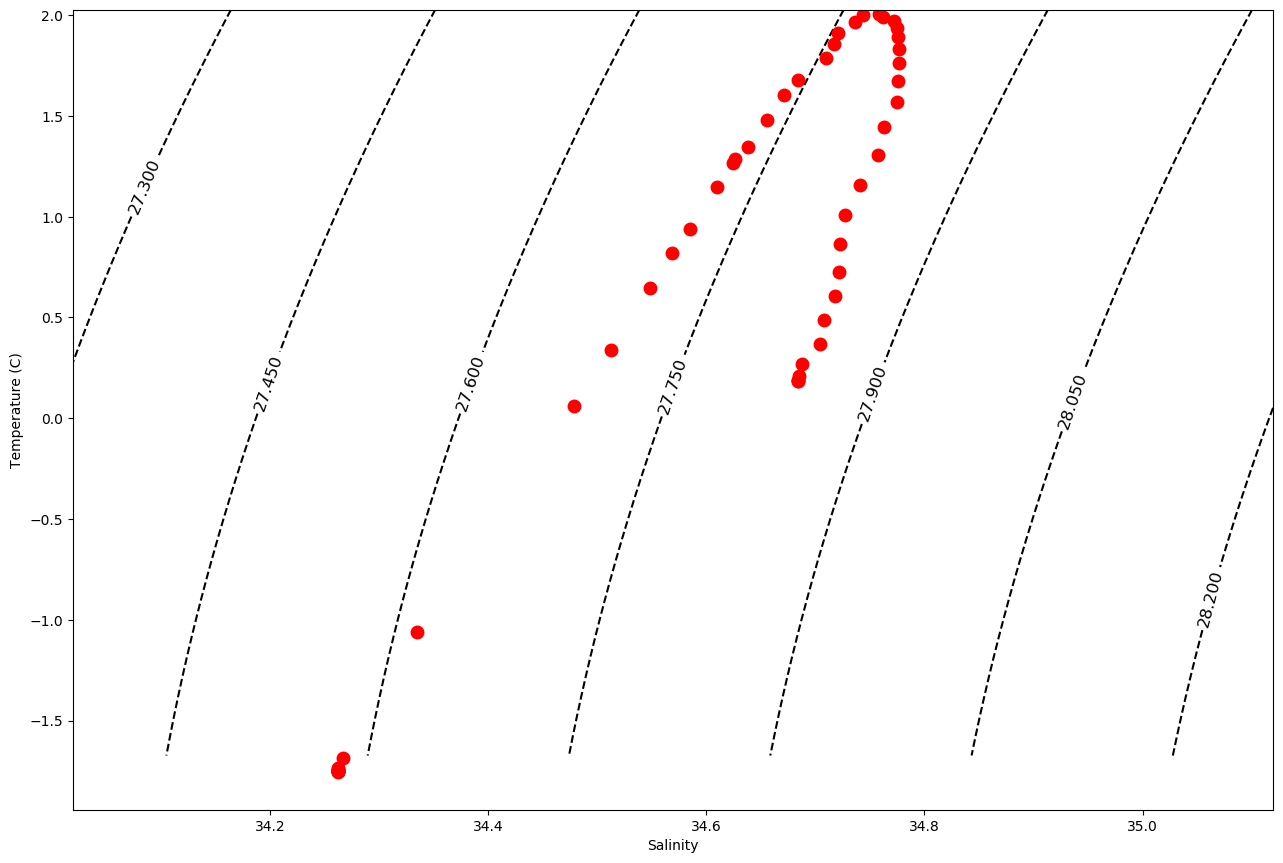

In [47]:
# Plot data ***********************************************
fig = plt.figure(figsize=(15, 10), dpi=100)
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
CS = plt.contour(si,ti,dens, linestyles='dashed', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%1.3f') # Label every second level
 
ax1.plot(salt,temp,'or',markersize=9)
 
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Temperature (C)')

In [17]:
temp

masked_array(data=[-1.7530956268310547, -1.7514188289642334,
                   -1.750778317451477, -1.750362515449524,
                   -1.749944806098938, -1.7494816780090332,
                   -1.7487961053848267, -1.7476965188980103,
                   -1.7458151578903198, -1.7421728372573853,
                   -1.7334309816360474, -1.6871635913848877,
                   -1.062355875968933, 0.060031112283468246,
                   0.33811044692993164, 0.6447842717170715,
                   0.8178383708000183, 0.9409968852996826,
                   1.1493135690689087, 1.2675262689590454,
                   1.288464903831482, 1.3476121425628662,
                   1.4783862829208374, 1.605085015296936,
                   1.6801344156265259, 1.785062313079834,
                   1.8548262119293213, 1.9099905490875244,
                   1.9645373821258545, 1.9989842176437378,
                   2.00766921043396, 1.9929176568984985,
                   1.9685587882995605, 1.93610441

In [18]:
gsw.

SyntaxError: invalid syntax (<ipython-input-18-eb5aa3897fcb>, line 1)